# Бейзлайн для решения домашнего задания на kaggle

https://www.kaggle.com/competitions/star-type-classification

In [ ]:
# Установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

# Загрузим датасет на прямую с kaggle
dataset_url = 'https://www.kaggle.com/competitions/star-type-classification'

# Upload Kaggle.json file to Colab… (Caution: Do not Share kaggle.json as contains API key of your Kaggle Account)

od.download(dataset_url)

Skipping, found downloaded files in "./star-type-classification" (use force=True to force download)


In [ ]:
import pandas as pd

train = pd.read_csv('/content/star-type-classification/train_star.csv')
test = pd.read_csv('/content/star-type-classification/test_star.csv')
sample_submit = pd.read_csv('/content/star-type-classification/sample_submition_stars.csv')

In [ ]:
train

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014,Giant
20728,9.11,4.71,0.87,0.485,F5V,17.475105,Giant
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129,Giant
20730,8.06,37.33,0.97,0.758,K1V,20.920290,Giant


## Исследование и предобработка данных

Прежде чем решать задачу классификации нам всегда важно узнать распределение целевой переменной: сколько объектов в каждом классе.

Проверка баланса классов в классификации — это ключевой шаг, потому что дисбаланс может сильно повлиять на качество модели и исказить оценку её производительности. Давайте разберёмся, почему это так важно!

🔸 Смещение модели в сторону большинства
Если один класс встречается гораздо чаще другого, модель может научиться просто предсказывать более частый класс, игнорируя меньшинство. Например, при 95% объектов одного класса и 5% другого модель может просто всегда предсказывать первый класс и получить 95% accuracy, хотя на практике она бесполезна для редкого класса.

🔸 Искажение метрик качества
В условиях дисбаланса такие метрики, как accuracy, становятся обманчивыми. Вместо этого важнее смотреть на метрики, учитывающие баланс классов:

Precision, Recall, F1-score — помогают оценить, как хорошо модель работает для каждого класса.
Матрица ошибок (confusion matrix) — показывает, какие именно ошибки допускает модель.

In [ ]:
train['TargetClass'].value_counts()

,count
TargetClass,
Giant,15793
Dwarf,4939


<ipython-input-8-907a1e1b427d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train, x = train['TargetClass'], ax=ax, palette='hls')


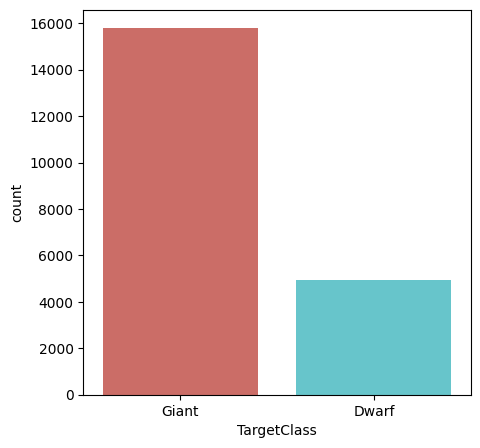

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(data = train, x = train['TargetClass'], ax=ax, palette='hls')
fig.show()

In [ ]:
# сразу закодируем целевую переменную
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train['TargetClass'])
train['TargetClass'] = le.transform(train['TargetClass'])

train.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,1
1,10.86,3.26,2.12,1.840,M1V:,18.426088,1
2,8.83,7.57,1.05,0.461,F3V,18.225480,1
3,7.72,24.80,0.89,0.613,G3IV,19.692257,1
4,8.81,3.17,1.03,0.872,G6III,16.315296,0


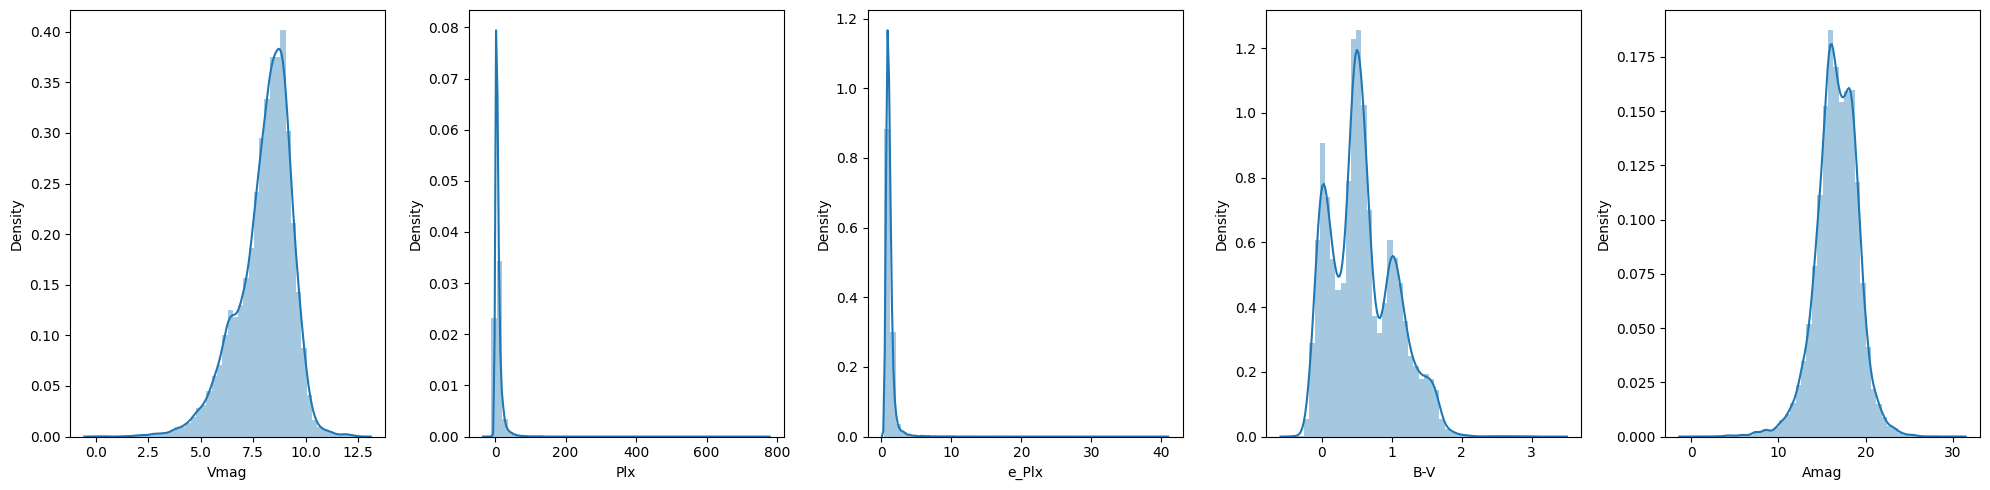

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(1, 5, figsize=(20,5))

sns.distplot(train['Vmag'], ax=axes[0])
sns.distplot(train['Plx'], ax=axes[1])
sns.distplot(train['e_Plx'], ax=axes[2])
sns.distplot(train['B-V'], ax=axes[3])
sns.distplot(train['Amag'], ax=axes[4])

plt.tight_layout()

## Проблема с колонкой `SpType`

Если вы внимательно прочитали условие, то вы обратили внимание на то как устроена классификация звезд в этой колонке:

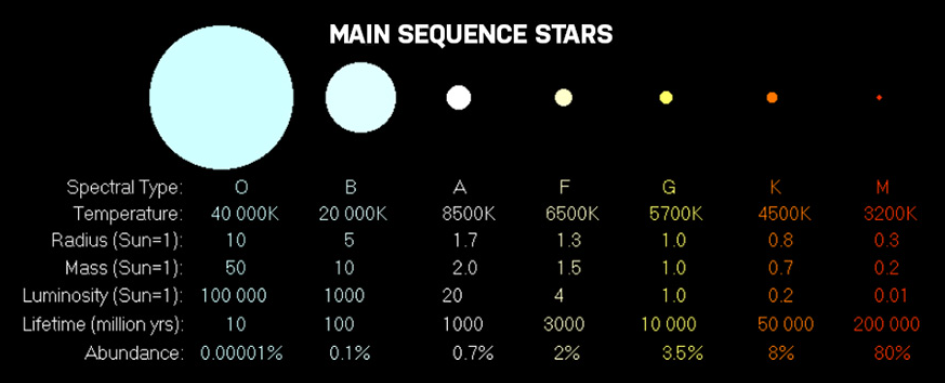

Эта система называется системой Моргана Кинана . Система Моргана-Кинана (МК):https://starparty.com/topics/astronomy/stars/the-morgan-keenan-system/

используется в современной астрономии как система классификации звезд по их спектральному классу и классу светимости. Система была представлена ​​Уильямом Уилсоном Морганом и Филипом Кинаном в 1943 году.

In [ ]:
# Возьмем как пример
train.loc[41, 'SpType']

# Тут видим, что по первой части классификации звезда относится к классу G, подклассу 5
# а по второй части классификации звезда относится к классу V

# Как видно их описании классификации, типы звезд напрямую влияют на ответ (гигант , карлик)
# Видно что все звезды типа O - это гиганты, например

'G2V'

In [ ]:
train

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014,Giant
20728,9.11,4.71,0.87,0.485,F5V,17.475105,Giant
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129,Giant
20730,8.06,37.33,0.97,0.758,K1V,20.920290,Giant


In [ ]:
# Всего различных вариантов - 1681
train['SpType'].nunique()

# но мы по классификации видим что по первой части всего возможно [O, B, A, F, G, K, M] - 7 вариантов
# по второй классификации - 8 типов
# 0 or Ia+ hypergiants or extremely luminous supergiants.
# Ia – luminous supergiants
# Iab – intermediate luminous supergiants
# Ib – less luminous supergiants
# II – bright giants
# III – normal giant stars
# IV – subgiants
# V main-sequence stars, also known as dwarf stars

# это явно меньше чем 1681 вариантов

1681

In [ ]:
# качественное решение подразумевает что вы правильно обработаете эту колонку
# но в базовом решении мы закодируем ее по "глупому"

from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()

le_type.fit(train['SpType'])
train['SpType'] = le_type.transform(train['SpType'])

train.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,1110,19.483625,1
1,10.86,3.26,2.12,1.840,1576,18.426088,1
2,8.83,7.57,1.05,0.461,836,18.225480,1
3,7.72,24.80,0.89,0.613,1086,19.692257,1
4,8.81,3.17,1.03,0.872,1175,16.315296,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(train['SpType'].values.reshape(-1,1))

encoded = encoder.transform(train['SpType'].values.reshape(-1,1))
encoded

array([[1110.],
       [1576.],
       [ 836.],
       ...,
       [  77.],
       [1395.],
       [1236.]])

In [ ]:
train['SpType'] = encoded

train

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,1110.0,19.483625,1
1,10.86,3.26,2.12,1.840,1576.0,18.426088,1
2,8.83,7.57,1.05,0.461,836.0,18.225480,1
3,7.72,24.80,0.89,0.613,1086.0,19.692257,1
4,8.81,3.17,1.03,0.872,1175.0,16.315296,0
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,988.0,17.933014,1
20728,9.11,4.71,0.87,0.485,885.0,17.475105,1
20729,9.69,1.61,1.56,0.384,77.0,15.724129,1
20730,8.06,37.33,0.97,0.758,1395.0,20.920290,1


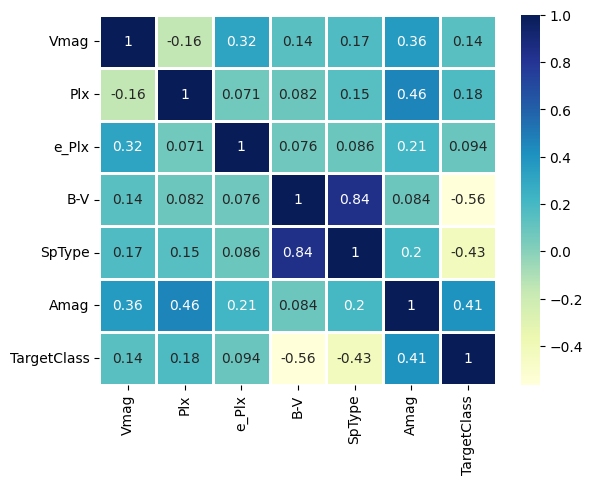

In [ ]:
# так как мы с вами будем использовать линейную модель, то
# мы обязаны проверить есть ли в данных линейная связь - корреляция
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

## Подготовка данных к обучению и тестированию алгоритмов

In [ ]:
# выделим вектор признаков
X = train.drop(columns=['TargetClass'])
# вектор целевой переменной
y = train['TargetClass']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (14512, 6), (14512,)
Train dataset size: (6220, 6), (6220,)


## Обучение алгоритмов и тестирование моделей

In [ ]:
from sklearn.linear_model import LogisticRegression

# Создадим модель дерева решений
log_reg = LogisticRegression()

# обучение модели
log_reg.fit(X_train, y_train)

# предсказание ответов для тестовой выборки
y_pred = log_reg.predict(X_test)

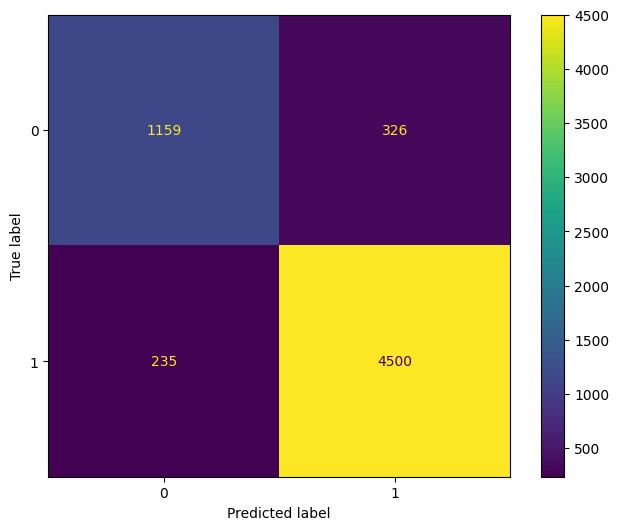

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=log_reg.classes_)

display.plot(ax=ax)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

Accuracy: 0.909807073954984
Precision: 0.9324492333195192
Recall: 0.9503695881731784
F1-score: 0.9413241292751804


In [ ]:
from sklearn.model_selection import cross_val_score
# пример с кросс валидацией

log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X, y, cv=6, scoring='f1')
scores

array([0.93712349, 0.9375825 , 0.94621627, 0.94119864, 0.94099849,
       0.93363414])

## Итоговый алгоритм

In [ ]:
from sklearn.linear_model import LogisticRegression

# Создадим модель логистической регрессии
log_reg = LogisticRegression()

# обучение модели
log_reg.fit(X, y)

LogisticRegression()

## Подготовка тестовых данных и получение результата

In [ ]:
test

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,7.91,6.33,1.01,0.843,G5III,16.917019
1,7.35,1.30,0.53,1.304,K1/K2III,12.919716
2,6.75,8.01,0.84,1.019,K1III,16.268162
3,4.47,7.03,0.72,1.283,K4III,13.704777
4,7.33,2.45,1.14,1.600,K5III,14.275830
...,...,...,...,...,...,...
18815,7.72,2.41,1.05,1.487,K4III,14.630085
18816,8.27,1.98,0.81,1.005,K0III,14.753326
18817,8.53,1.14,0.89,-0.093,B7/B8III,13.814524
18818,9.09,6.41,1.10,0.480,F6V,18.124290


In [ ]:
test['SpType'] = le_type.transform(test['SpType'])

test.head()

# Ошибка! Почему?

ValueError: y contains previously unseen labels: 'K2III/IVCNII'

In [ ]:
encoded_test = encoder.transform(test['SpType'].values.reshape(-1,1))
encoded_test

array([[ 1.119e+03],
       [ 1.350e+03],
       [ 1.371e+03],
       ...,
       [-1.000e+00],
       [ 9.180e+02],
       [ 1.650e+03]])

In [ ]:
test['SpType'] = encoded_test

print(test.shape)
test[test['SpType'] == -1]

(18820, 6)


,Vmag,Plx,e_Plx,B-V,SpType,Amag
10,7.72,7.58,0.81,1.191,-1.0,17.118345
15,8.77,2.39,1.63,1.538,-1.0,15.661990
23,4.26,0.47,0.60,-0.008,-1.0,7.620490
60,6.20,8.31,0.68,0.410,-1.0,15.798005
78,8.02,17.12,1.00,0.667,-1.0,19.187520
...,...,...,...,...,...,...
18729,8.27,5.58,0.98,0.895,-1.0,17.003172
18771,5.65,9.41,0.85,0.779,-1.0,15.517948
18782,7.42,1.97,0.70,0.302,-1.0,13.892331
18785,7.66,2.43,1.07,1.437,-1.0,14.588032


In [ ]:
y_pred_test = log_reg.predict(test)
y_pred_test

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
ans_df = pd.DataFrame(y_pred_test, columns=['TargetClass'])

ans_df.reset_index(inplace=True)

In [ ]:
ans_df

,index,TargetClass
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
18815,18815,0
18816,18816,0
18817,18817,1
18818,18818,1


In [ ]:
ans_df.to_csv('submition_v1.csv', index=False)